In [87]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [88]:
def get_perform(actual, predict):
    acc_score = accuracy_score(actual, predict)
    prec_score = precision_score(actual, predict,average='macro')
    rec_score = recall_score(actual, predict,average='macro')
    f1 = f1_score(actual, predict, average='macro')
    return pd.DataFrame({
        "accuracy_score":[acc_score],
        "precision_score":[prec_score],
        "recall_score": [rec_score],
        "f1_score":[f1]
    })

In [89]:
pd.set_option('display.max_columns', 50)

In [90]:
data = pd.read_csv(r"F:\GUVI\Project\capstone -4\cleaned data\Cleaned_sample_data.csv", index_col=0)

In [91]:
data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,2024-06-06,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-03,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-13,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,2024-06-08,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,2024-06-09,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-10,10:25:17
4758414,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-11,19:30:52
4758415,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-09,04:27:41
4758416,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-05-21,23:01:11


In [92]:
data.duplicated().sum()

156194

In [93]:
data.drop_duplicates(inplace=True)

In [94]:
data.duplicated().sum()

0

In [95]:
data.isnull().mean()

Id                    0.0
OrgId                 0.0
IncidentId            0.0
AlertId               0.0
DetectorId            0.0
AlertTitle            0.0
Category              0.0
IncidentGrade         0.0
EntityType            0.0
EvidenceRole          0.0
DeviceId              0.0
Sha256                0.0
IpAddress             0.0
Url                   0.0
AccountSid            0.0
AccountUpn            0.0
AccountObjectId       0.0
AccountName           0.0
DeviceName            0.0
NetworkMessageId      0.0
RegistryKey           0.0
RegistryValueName     0.0
RegistryValueData     0.0
ApplicationId         0.0
ApplicationName       0.0
OAuthApplicationId    0.0
FileName              0.0
FolderPath            0.0
ResourceIdName        0.0
OSFamily              0.0
OSVersion             0.0
CountryCode           0.0
State                 0.0
City                  0.0
Date                  0.0
Time                  0.0
dtype: float64

In [96]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Date', 'Time'],
      dtype='object')

In [97]:
data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,2024-06-06,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-03,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-13,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,2024-06-08,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,2024-06-09,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-10,10:25:17
4758414,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-11,19:30:52
4758415,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-09,04:27:41
4758416,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-05-21,23:01:11


In [98]:
len(data["City"].value_counts())

7107

In [99]:
data["City"].value_counts()

City
10630    4287478
0          51631
1          11051
2           9682
3           7876
          ...   
6221           1
8018           1
9766           1
7387           1
7059           1
Name: count, Length: 7107, dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

In [101]:
onehot_columns = ["CountryCode", "State", "City"]

In [102]:

le = LabelEncoder()

for i in data.select_dtypes(include="object"):
    data[i] = le.fit_transform(data[i])

In [103]:
# Function to group categories
def replace_with_top_5(data, column):
    # Get top 5 categories
    top_3 = data[column].value_counts().nlargest(3).index
    # Replace categories that are not in top 5 with 'Other'
    data[column] = data[column].apply(lambda x: x if x in top_3 else 'Other')
    return data

In [104]:
for col in onehot_columns:
    df = replace_with_top_5(data, col)

In [105]:
data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date,Time
0,1709396985476,26,18583,687462,31,813,12,0,9,1,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,154,21407
1,927712939180,33,5065,3990,38,25,9,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,151,38709
2,1090921697002,201,150787,807590,419,444,6,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,161,13000
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,156,60897
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,157,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,7,1,19,0,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,158,37517
4758414,1683627184337,36,1001,257479,2,2,1,1,30,0,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,159,70252
4758415,1597727836318,851,31194,1518250,1,1,10,0,19,1,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,157,16061
4758416,137438957239,12,2419,1203,16,1334,9,0,13,1,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,138,82871


In [106]:
# OneHotEncoder


data[onehot_columns] = data[onehot_columns].astype(str)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(data[onehot_columns])

In [107]:
# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(onehot_columns))

# Drop the original columns and concatenate the encoded columns
data = data.drop(columns=onehot_columns).reset_index(drop=True)
data1 = pd.concat([data, encoded_df], axis=1)

# Display the transformed DataFrame
data1.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,Date,Time,CountryCode_1,CountryCode_242,CountryCode_Other,State_1,State_1445,State_Other,City_1,City_10630,City_Other
0,1709396985476,26,18583,687462,31,813,12,0,9,1,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,154,21407,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,927712939180,33,5065,3990,38,25,9,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,151,38709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1090921697002,201,150787,807590,419,444,6,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,161,13000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,156,60897,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,157,10081,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [108]:
data1.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'Date', 'Time',
       'CountryCode_1', 'CountryCode_242', 'CountryCode_Other', 'State_1',
       'State_1445', 'State_Other', 'City_1', 'City_10630', 'City_Other'],
      dtype='object')

In [109]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602224 entries, 0 to 4602223
Data columns (total 42 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            int32  
 7   IncidentGrade       int32  
 8   EntityType          int32  
 9   EvidenceRole        int32  
 10  DeviceId            int64  
 11  Sha256              int64  
 12  IpAddress           int64  
 13  Url                 int64  
 14  AccountSid          int64  
 15  AccountUpn          int64  
 16  AccountObjectId     int64  
 17  AccountName         int64  
 18  DeviceName          int64  
 19  NetworkMessageId    int64  
 20  RegistryKey         int64  
 21  RegistryValueName   int64  
 22  RegistryValueData   int64  
 23  ApplicationId       int64  
 24  ApplicationName     int6

In [110]:
feature_cols = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'Date', 'Time',
       'CountryCode_1', 'CountryCode_242', 'CountryCode_Other', 'State_1',
       'State_1445', 'State_Other', 'City_1', 'City_10630', 'City_Other']

In [111]:
# numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns

mm = MinMaxScaler()
data1[feature_cols]  = mm.fit_transform(data1[feature_cols])

In [112]:
data1

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,Date,Time,CountryCode_1,CountryCode_242,CountryCode_Other,State_1,State_1445,State_Other,City_1,City_10630,City_Other
0,1.000000,0.004230,0.030987,0.399349,0.003256,0.007184,0.631579,0,0.300000,1.0,1.0,0.009373,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.014269,0.035923,1.0,1.0,1.0,0.933333,0.247769,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.542714,0.005368,0.008446,0.002318,0.003991,0.000221,0.473684,0,0.566667,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.020525,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.915152,0.448026,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.638191,0.032699,0.251436,0.469132,0.044003,0.003923,0.315789,0,0.566667,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.027312,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.975758,0.150465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.839196,0.033187,0.180568,0.016599,0.004621,0.010895,0.842105,2,0.300000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.335000,0.077991,1.0,1.0,1.0,0.945455,0.704835,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.587940,0.008785,0.880773,0.847089,0.010712,0.519815,0.368421,0,0.300000,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.138058,0.972643,1.0,1.0,1.0,0.951515,0.116680,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602219,0.060302,0.023101,0.156723,0.009143,0.011762,0.069239,0.368421,1,0.633333,0.0,1.0,1.000000,1.000000,1.0,1.000000,0.458006,1.000000,1.000000,1.000000,0.001641,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.957576,0.434230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602220,0.984925,0.005857,0.001669,0.149570,0.000210,0.000018,0.052632,1,1.000000,0.0,1.0,1.000000,1.000000,1.0,0.072765,0.142578,0.077457,0.081584,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.963636,0.813111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602221,0.934673,0.138442,0.052016,0.881957,0.000105,0.000009,0.526316,0,0.633333,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.062729,1.000000,1.000000,1.000000,0.759512,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.951515,0.185893,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602222,0.080402,0.001952,0.004034,0.000699,0.001680,0.011787,0.473684,0,0.433333,1.0,1.0,1.000000,0.001514,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,0.836364,0.959166,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [113]:
data1.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'Date', 'Time',
       'CountryCode_1', 'CountryCode_242', 'CountryCode_Other', 'State_1',
       'State_1445', 'State_Other', 'City_1', 'City_10630', 'City_Other'],
      dtype='object')

In [114]:
data_corr = data1.corr()

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

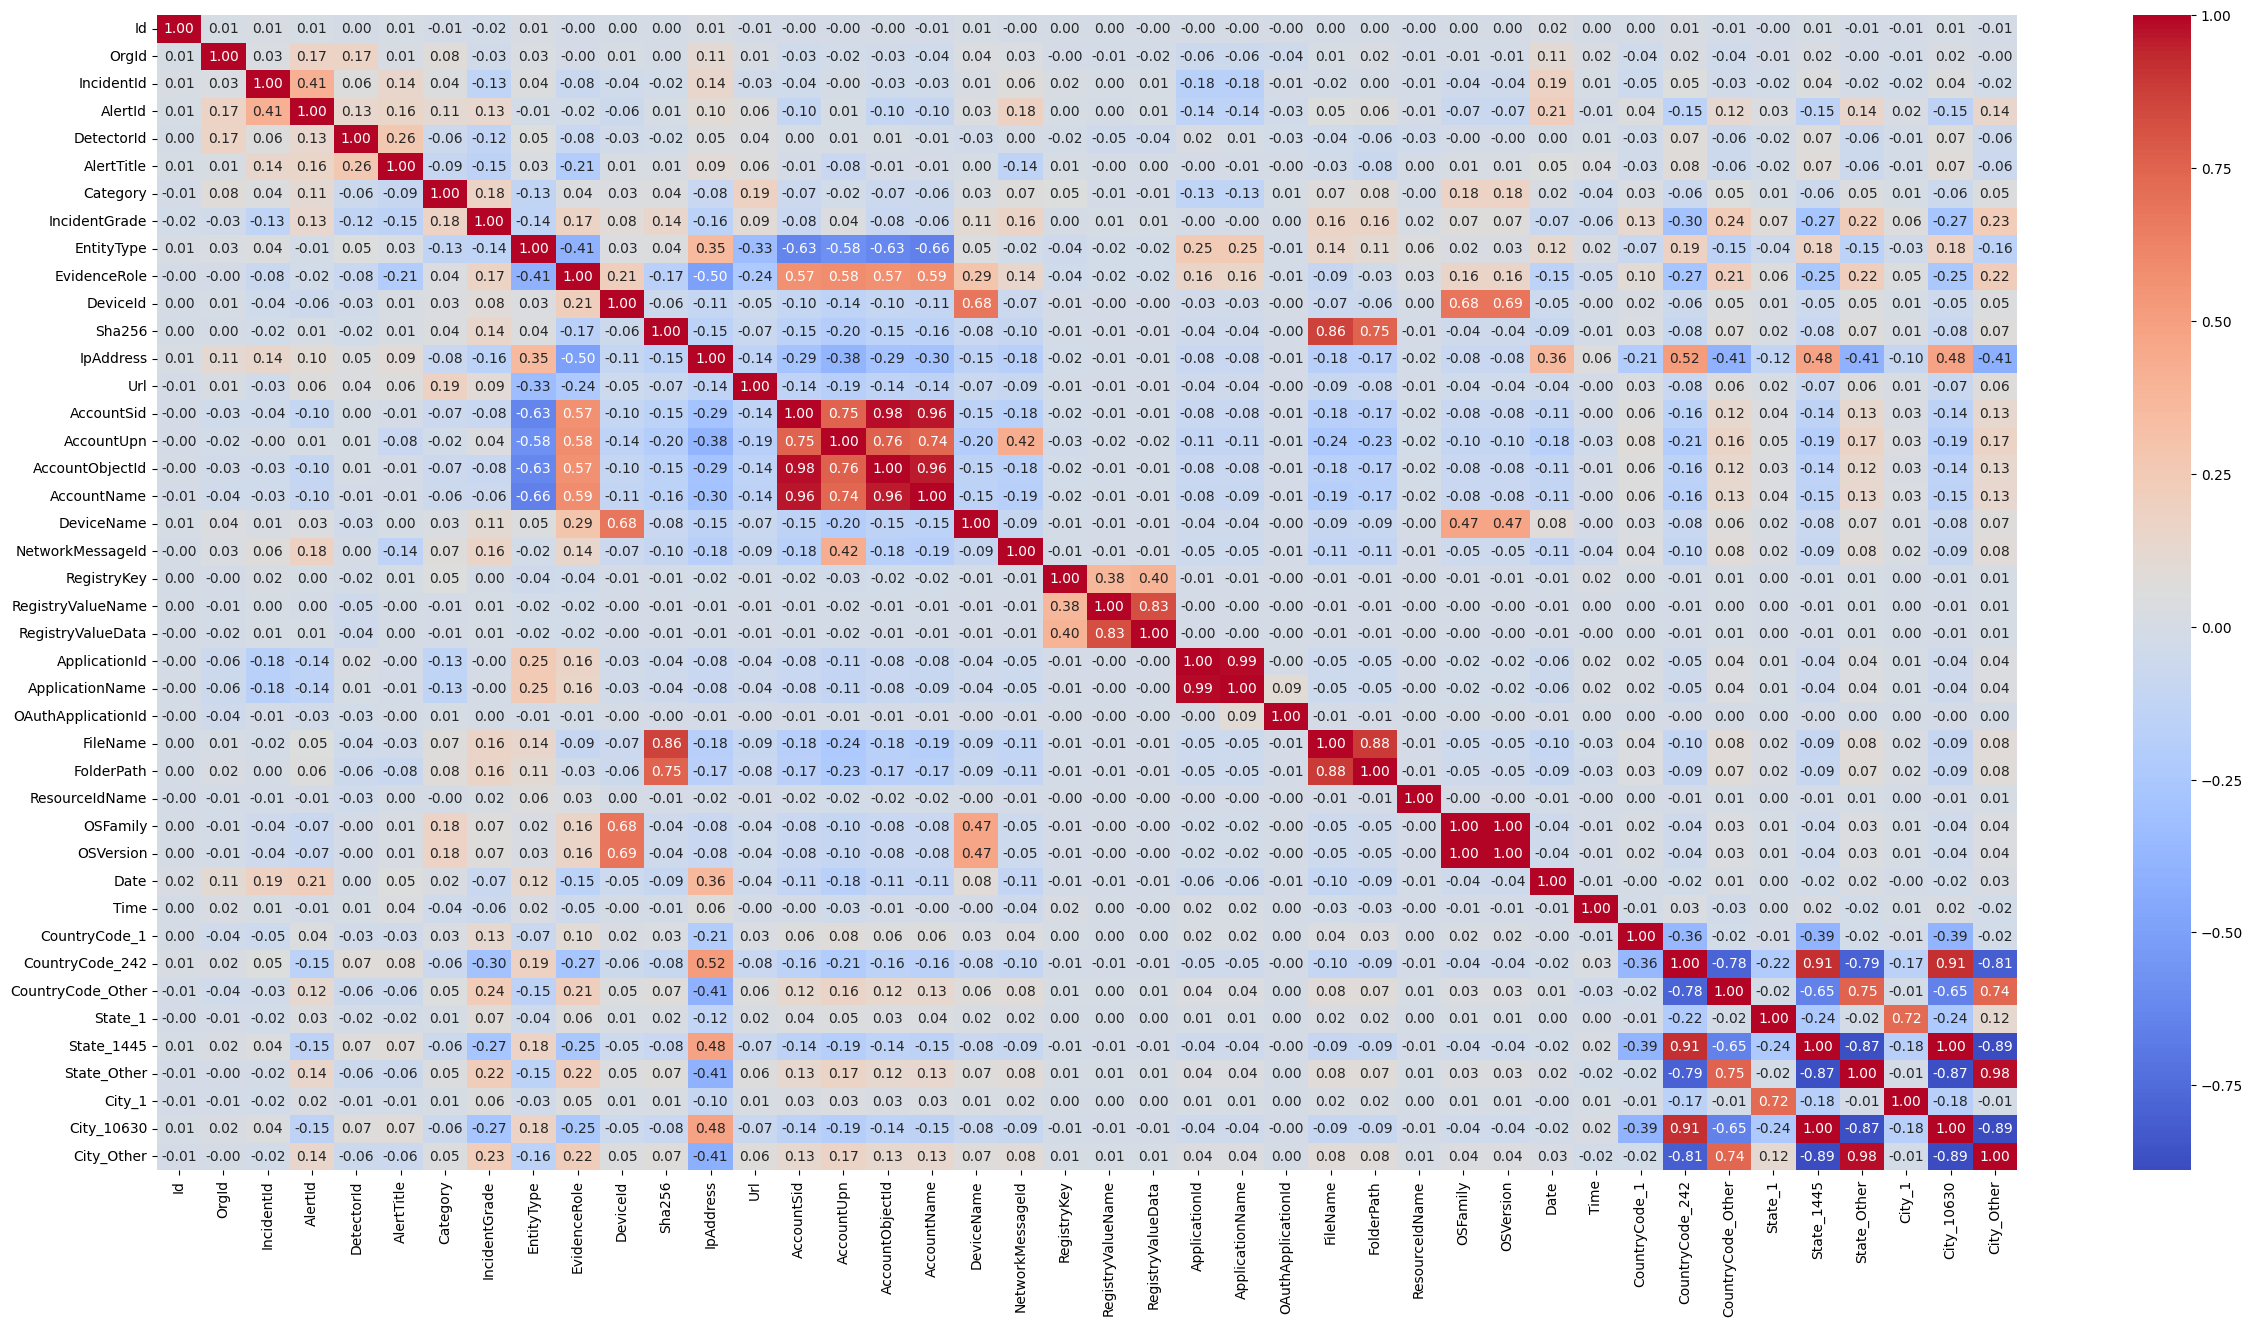

In [116]:
plt.figure(figsize=(30,15))
sns.heatmap(data=data_corr,fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

In [117]:
correlated_columns = ['FileName','FolderPath','AccountUpn','AccountObjectId','AccountName','DeviceName','NetworkMessageId','RegistryValueData',
 'ApplicationName','OSVersion']

In [118]:
data1.drop(correlated_columns, axis=1, inplace=True)

In [119]:
data1

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,Date,Time,CountryCode_1,CountryCode_242,CountryCode_Other,State_1,State_1445,State_Other,City_1,City_10630,City_Other
0,1.000000,0.004230,0.030987,0.399349,0.003256,0.007184,0.631579,0,0.300000,1.0,1.0,0.009373,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.933333,0.247769,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.542714,0.005368,0.008446,0.002318,0.003991,0.000221,0.473684,0,0.566667,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.915152,0.448026,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.638191,0.032699,0.251436,0.469132,0.044003,0.003923,0.315789,0,0.566667,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.975758,0.150465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.839196,0.033187,0.180568,0.016599,0.004621,0.010895,0.842105,2,0.300000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.945455,0.704835,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.587940,0.008785,0.880773,0.847089,0.010712,0.519815,0.368421,0,0.300000,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.951515,0.116680,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602219,0.060302,0.023101,0.156723,0.009143,0.011762,0.069239,0.368421,1,0.633333,0.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.957576,0.434230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602220,0.984925,0.005857,0.001669,0.149570,0.000210,0.000018,0.052632,1,1.000000,0.0,1.0,1.000000,1.000000,1.0,0.072765,1.0,1.0,1.000000,1.0,1.0,1.0,0.963636,0.813111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602221,0.934673,0.138442,0.052016,0.881957,0.000105,0.000009,0.526316,0,0.633333,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.951515,0.185893,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4602222,0.080402,0.001952,0.004034,0.000699,0.001680,0.011787,0.473684,0,0.433333,1.0,1.0,1.000000,0.001514,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.836364,0.959166,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [120]:
val = data1.drop("IncidentGrade", axis=1)
tar = data1["IncidentGrade"]

In [121]:
train_data, test_data, train_lab, test_lab = train_test_split(val, tar, test_size=0.20, random_state=101)

In [122]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(train_data, train_lab)
lr_train_pred = lr.predict(train_data)
lr_test_pred = lr.predict(test_data)

c:\Users\syeda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
get_perform(train_lab, lr_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.604873,0.590168,0.526448,0.507679


In [124]:
get_perform(test_lab, lr_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.604653,0.590749,0.526551,0.507626


In [137]:
# DecisionTree Classifier

dtc = DecisionTreeClassifier(max_depth=25, random_state=45, criterion="gini")
dtc.fit(train_data, train_lab)
dtc_train_pred = dtc.predict(train_data)
dtc_test_pred = dtc.predict(test_data)

In [138]:
get_perform(train_lab, dtc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.954192,0.954891,0.94957,0.952102


In [139]:
get_perform(test_lab, dtc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.951356,0.951757,0.946387,0.94894


In [140]:
# RandomForest Classifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=54)
rfc.fit(train_data, train_lab)
rfc_train_pred = rfc.predict(train_data)
rfc_test_pred = rfc.predict(test_data)

In [141]:
get_perform(train_lab, rfc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.939799,0.955077,0.926806,0.93825


In [142]:
get_perform(test_lab, rfc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.927705,0.943711,0.912929,0.925138


In [143]:
# XGBClassifier

xgbc = xg.XGBClassifier()
xgbc.fit(train_data, train_lab)
xgbc_train_pred = xgbc.predict(train_data)
xgbc_test_pred = xgbc.predict(test_data)

In [144]:
get_perform(train_lab, xgbc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.918637,0.924949,0.90662,0.914486


In [145]:
get_perform(test_lab, xgbc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.918464,0.9249,0.90646,0.914358


In [148]:
import pickle

with open("XGBClassifier1.pkl",'wb') as file:
    pickle.dump(xgbc, file)